In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
titanic_df = pd.read_csv(r'./datasets/train.csv')

In [3]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
titanic_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


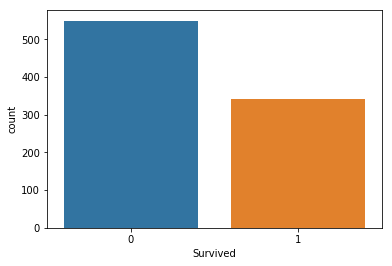

In [8]:
sns.countplot(x = 'Survived', data = titanic_df);

(array([216.,   0.,   0.,   0.,   0., 184.,   0.,   0.,   0., 491.]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <a list of 10 Patch objects>)

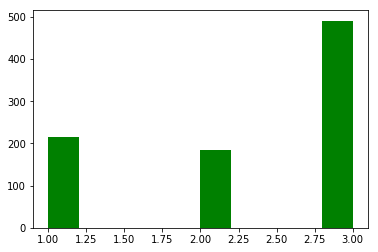

In [9]:
plt.hist(titanic_df['Pclass'], color = 'green')

In [10]:
print(titanic_df.Survived.sum())

342


In [11]:
print(titanic_df.Survived.count())

891


In [12]:
print(titanic_df.Survived.sum()/titanic_df.Survived.count())

0.3838383838383838


In [13]:
titanic_df.groupby(['Survived','Sex'])['Survived'].count()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Survived, dtype: int64

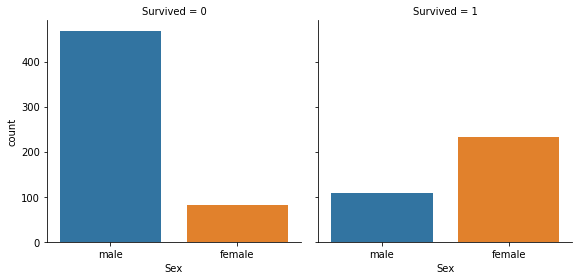

In [14]:
sns.factorplot(x = 'Sex', col = 'Survived', 
               kind = 'count', data = titanic_df);

In [15]:
print("% of women survived: " , 
      titanic_df[titanic_df.Sex == 'female'].Survived.sum()/
      titanic_df[titanic_df.Sex == 'female'].Survived.count())

% of women survived:  0.7420382165605095


In [16]:
print("% of men survived:   " ,
      titanic_df[titanic_df.Sex == 'male'].Survived.sum()/
      titanic_df[titanic_df.Sex == 'male'].Survived.count())

% of men survived:    0.18890814558058924


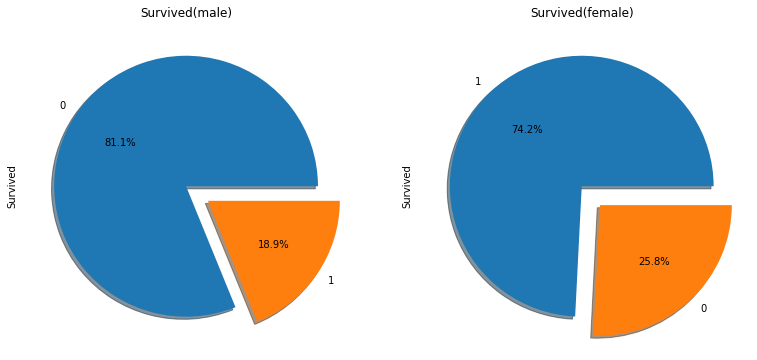

In [17]:
f,ax = plt.subplots(1, 2, figsize = (13, 6))
titanic_df['Survived'][titanic_df['Sex'] == 'male'].value_counts().plot.pie(explode = [0, 0.2],
                                                                            autopct = '%1.1f%%',
                                                                            ax = ax[0],
                                                                            shadow = True)
titanic_df['Survived'][titanic_df['Sex'] == 'female'].value_counts().plot.pie(explode = [0, 0.2],
                                                                              autopct = '%1.1f%%',
                                                                              ax = ax[1],
                                                                              shadow = True)
ax[0].set_title('Survived(male)')
ax[1].set_title('Survived(female)')

plt.show()

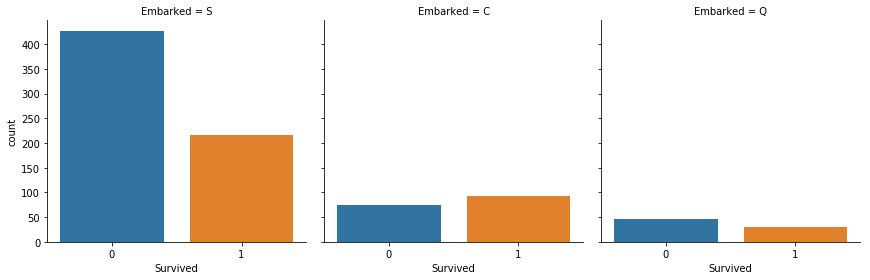

In [18]:
sns.factorplot(x = 'Survived', col = 'Embarked', 
               kind = 'count', data = titanic_df);

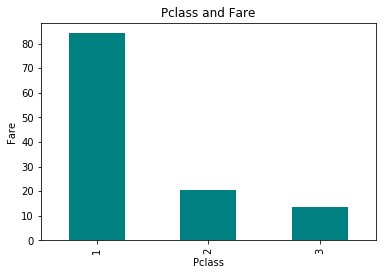

In [19]:
titanic_df.groupby('Pclass')['Fare'].mean().plot(kind = 'bar', color = 'teal');
plt.title("Pclass and Fare")
plt.ylabel('Fare')
plt.xlabel('Pclass');

In [20]:
titanic_df_ml = titanic_df.copy()

In [21]:
titanic_df_ml = pd.get_dummies(titanic_df_ml, 
                               columns = ['Sex', 'Embarked', 'Pclass'],
                               drop_first = True)

In [22]:
titanic_df_ml.drop(['PassengerId','Name','Ticket',
                    'Cabin', 'SibSp', 'Parch'],
                    axis = 1, inplace = True)

In [23]:
titanic_df_ml.dropna(inplace = True)

In [24]:
titanic_df_ml.head(10)

,Survived,Age,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,7.2500,1,0,1,0,1
1,1,38.0,71.2833,0,0,0,0,0
2,1,26.0,7.9250,0,0,1,0,1
3,1,35.0,53.1000,0,0,1,0,0
4,0,35.0,8.0500,1,0,1,0,1
6,0,54.0,51.8625,1,0,1,0,0
7,0,2.0,21.0750,1,0,1,0,1
8,1,27.0,11.1333,0,0,1,0,1
9,1,14.0,30.0708,0,0,0,1,0
10,1,4.0,16.7000,0,0,1,0,1


In [25]:
titanic_df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 8 columns):
Survived      714 non-null int64
Age           714 non-null float64
Fare          714 non-null float64
Sex_male      714 non-null uint8
Embarked_Q    714 non-null uint8
Embarked_S    714 non-null uint8
Pclass_2      714 non-null uint8
Pclass_3      714 non-null uint8
dtypes: float64(2), int64(1), uint8(5)
memory usage: 25.8 KB


In [26]:
correlation = titanic_df_ml.corr()

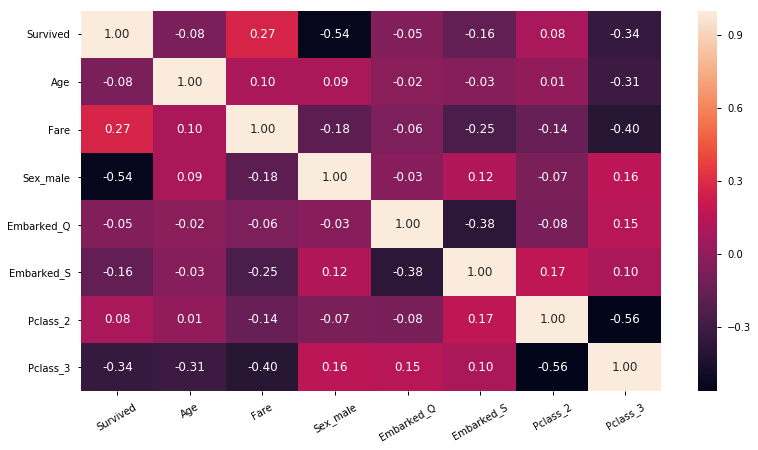

In [27]:
sns.set_context("notebook", font_scale = 1.0, rc = {"lines.linewidth" : 2.5})
plt.figure(figsize = (13, 7))

a = sns.heatmap(correlation, annot = True, fmt = '.2f')

rotx = a.set_xticklabels(a.get_xticklabels(), rotation = 30)
roty = a.set_yticklabels(a.get_yticklabels(), rotation = 0)